In [1]:
import os
import pandas as pd
from math import pi
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
from scipy.stats.stats import pearsonr
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
os.chdir ("/home/apprenant/PycharmProjects/pythonProject/FoodFlix/File/02_Cleaned")

In [3]:
food_facts=pd.read_csv('food_facts_fr.csv')
food_facts.sample(5)

,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_en,countries_en,ingredients_text,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
99747,yaourt caramel,1,NaN,NaN,swiss delice,NaN,NaN,NaN,france,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70998,17 galettes de riz complet,130 g,"plastique,sachet","plastique,sachet","bio village,marque repère","en:plant-based-foods-and-beverages, en:plant-b...","en:plant-based-foods-and-beverages,en:plant-ba...","plant-based foods and beverages,plant-based fo...",france,"riz complet 99,7%, sel marin",...,2.80,0.5,83.6,0.5,3.6,7.9,0.303,0.119291,-4.0,-4.0
46668,oasis so fuzz,8 x 59.8 g,"carton,plastique,surgelé","carton,plastique,surgele","oasis,kergamet",glaces,"en:desserts,en:frozen-foods,en:frozen-desserts...","desserts,frozen foods,frozen desserts,ice crea...",france,"eau, sucre, jus de citron à base de concentré ...",...,0.02,0.0,20.3,17.7,0.1,0.1,0.000,0.000000,4.0,4.0
6108,gouda light jeune,NaN,NaN,NaN,linessa,NaN,NaN,NaN,france,messa vital & active gouda light allégé sneden...,...,18.80,11.8,0.0,0.0,0.0,25.5,1.900,0.748031,21.0,21.0
73045,assortiment de roulades,12,"sous atmosphère protectrice,frais,plastique","sous-atmosphere-protectrice,frais,plastique","pouce,auchan,auchan pouce","viandes,charcuteries","en:meats,en:prepared-meats","meats,prepared meats",france,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


   ### To get a view of numerical variables:

In [4]:
food_facts.describe()


,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,76309.000000,76309.000000,76309.000000,85419.000000,70713.000000,83707.000000,70324.000000,83775.000000,5.728200e+04,85206.000000,83807.000000,83804.000000,82457.000000,82457.000000
mean,1.714319,0.061683,0.129080,1110.984330,13.242221,5.229661,27.512940,13.260312,1.480715e+06,7.861727,1.168093,0.459895,8.808239,8.398547
std,2.476392,0.243828,0.421492,774.471806,16.967630,8.243683,27.316172,19.011585,3.543886e+08,8.428446,4.341542,1.709296,8.892330,9.200107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,431.000000,1.140000,0.300000,4.000000,1.000000,0.000000e+00,1.600000,0.060000,0.023622,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1034.000000,6.900000,1.900000,14.500000,4.000000,1.400000e+00,5.900000,0.520000,0.204724,9.000000,7.000000
75%,3.000000,0.000000,0.000000,1640.000000,20.800000,7.000000,52.500000,17.400000,3.300000e+00,11.000000,1.250000,0.492126,15.000000,16.000000
max,30.000000,2.000000,5.000000,6276.000000,105.000000,100.000000,164.000000,145.000000,8.481815e+10,305.000000,100.000000,39.370079,40.000000,37.000000


In [5]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109991 entries, 0 to 109990
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             109599 non-null  object 
 1   quantity                                 71485 non-null   object 
 2   packaging                                59838 non-null   object 
 3   packaging_tags                           59838 non-null   object 
 4   brands                                   104395 non-null  object 
 5   categories                               67358 non-null   object 
 6   categories_tags                          67358 non-null   object 
 7   categories_en                            67358 non-null   object 
 8   countries_en                             109991 non-null  object 
 9   ingredients_text                         76309 non-null   object 
 10  additives_n                     

   ###  filling only numerical value by 0 for charts :

In [6]:
food_fact_num = food_facts.copy()
numeric_cols = list(food_facts.select_dtypes(exclude=['object']).columns)
food_fact_num[numeric_cols] = food_facts[numeric_cols].fillna(0)

   ### To get a visual representation of the numerical variables:

array([[<AxesSubplot:title={'center':'additives_n'}>,
        <AxesSubplot:title={'center':'ingredients_from_palm_oil_n'}>,
        <AxesSubplot:title={'center':'ingredients_that_may_be_from_palm_oil_n'}>,
        <AxesSubplot:title={'center':'energy_100g'}>],
       [<AxesSubplot:title={'center':'fat_100g'}>,
        <AxesSubplot:title={'center':'saturated-fat_100g'}>,
        <AxesSubplot:title={'center':'carbohydrates_100g'}>,
        <AxesSubplot:title={'center':'sugars_100g'}>],
       [<AxesSubplot:title={'center':'fiber_100g'}>,
        <AxesSubplot:title={'center':'proteins_100g'}>,
        <AxesSubplot:title={'center':'salt_100g'}>,
        <AxesSubplot:title={'center':'sodium_100g'}>],
       [<AxesSubplot:title={'center':'nutrition-score-fr_100g'}>,
        <AxesSubplot:title={'center':'nutrition-score-uk_100g'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

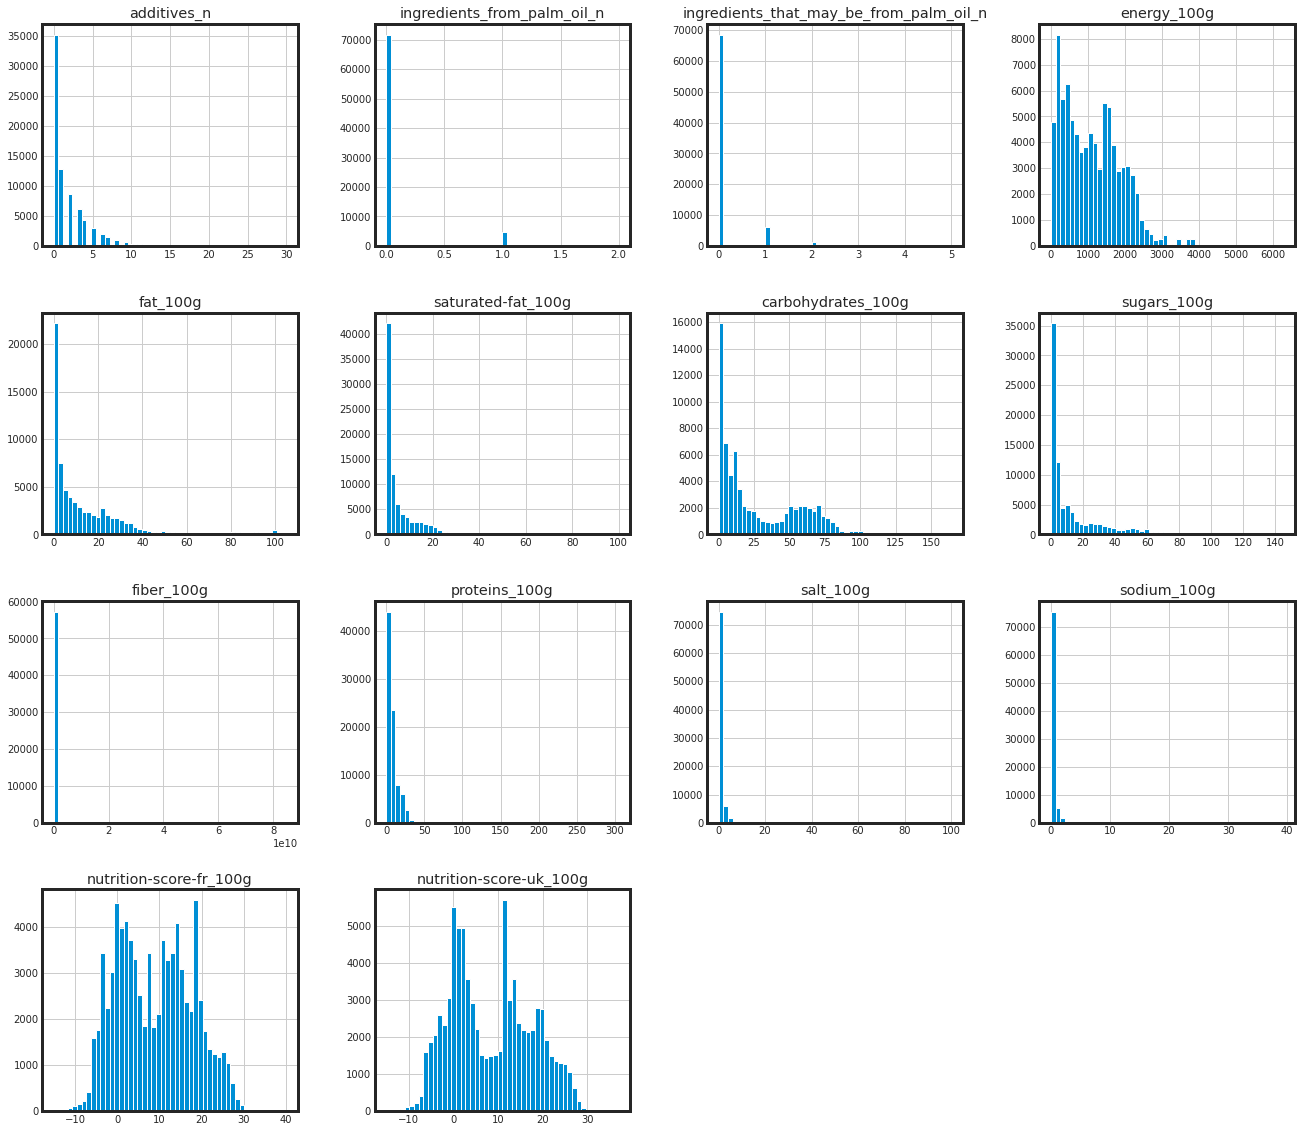

In [5]:
sns.set_style('white', {'legend.frameon':True})
food_facts.hist(bins=50, figsize=(20,20))

<AxesSubplot:>

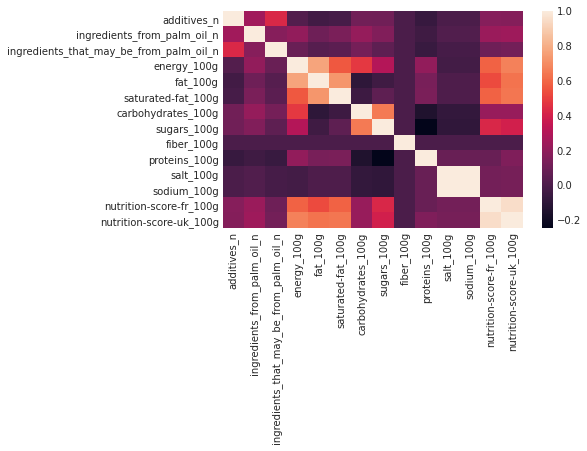

In [7]:
# Get a list of all numeric columns:
numeric_cols = list(food_facts.select_dtypes(exclude=['object']).columns)

food_corrmat = food_facts[numeric_cols].corr()
sns.heatmap(food_corrmat)

  From the correlation heatmap, we can see that salt_100g and sodium_100g columns are redundant (it would be wise to remove one of them. The same holds true for the columns nutrition_score-fr_100g and nutrition_score-uk_100g (which should be expected).

We can also suggest that fat_100g, saturated_fat_100g and sugars_100g are correlated with the nutritional score columns.

Cleaning further the dataset before bivariate analysis and to take into account object type variables


### Inspecting the object variables:

In [8]:
food_facts.describe(include=['object'])

,product_name,quantity,packaging,packaging_tags,brands,categories,categories_tags,categories_en,countries_en,ingredients_text,additives,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states_en,main_category,main_category_en
count,109599,71485,59838,59838,104395,67358,67358,67358,109991,76309,76291,82457,85776,88110,109991,67358,67358
unique,87911,9502,9146,8831,22688,27901,16591,16591,1,71243,68257,5,13,37,681,1375,1375
top,huile d'olive vierge extra,500 g,"sachet,plastique","sachet,plastique",carrefour,en:beverages,"en:beverages,en:non-sugared-beverages","beverages,non-sugared beverages",france,semoule de _blé_ dur de qualité supérieure.,[ semoule-de-ble-dur-de-qualite-superieure ->...,d,unknown,unknown,"to be checked,complete,nutrition facts complet...",en:plant-based-foods-and-beverages,plant-based foods and beverages
freq,79,3326,4353,4354,3112,1992,1969,1969,109991,110,192,23166,28161,28161,13434,14213,14213


In [9]:
# The nutrition_grade col seems to correspond to the nutriscore grade
# Checking whether the nutrition_score fill the same rows as the nutrition_grade
print(food_facts['nutrition-score-fr_100g'].isnull().equals(food_facts['nutrition_grade_fr'].isnull()))


True


In [9]:
all_col_list = food_facts.columns.to_list()
col_list_to_remove = ['salt_100g', 'nutrition-score-uk_100g', 'product_name', 'quantity',
 'packaging', 'packaging_tags', 'categories', 'categories_en','states_en','main_category_en','countries_en','additives','ingredients_text','brands', 'categories_tags', 'main_category']
# Removing the corresponding cols
df_explore = food_facts.drop(col_list_to_remove, axis=1)
# Removing the empty rows
df_explore = df_explore[df_explore['nutrition_grade_fr'].notnull()]

In [11]:
df_explore.describe(include=['object'])

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2
count,82457,70814,70868
unique,5,13,36
top,d,unknown,unknown
freq,23166,24260,24260


<ipython-input-11-eab6f1d9ce56>:11: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



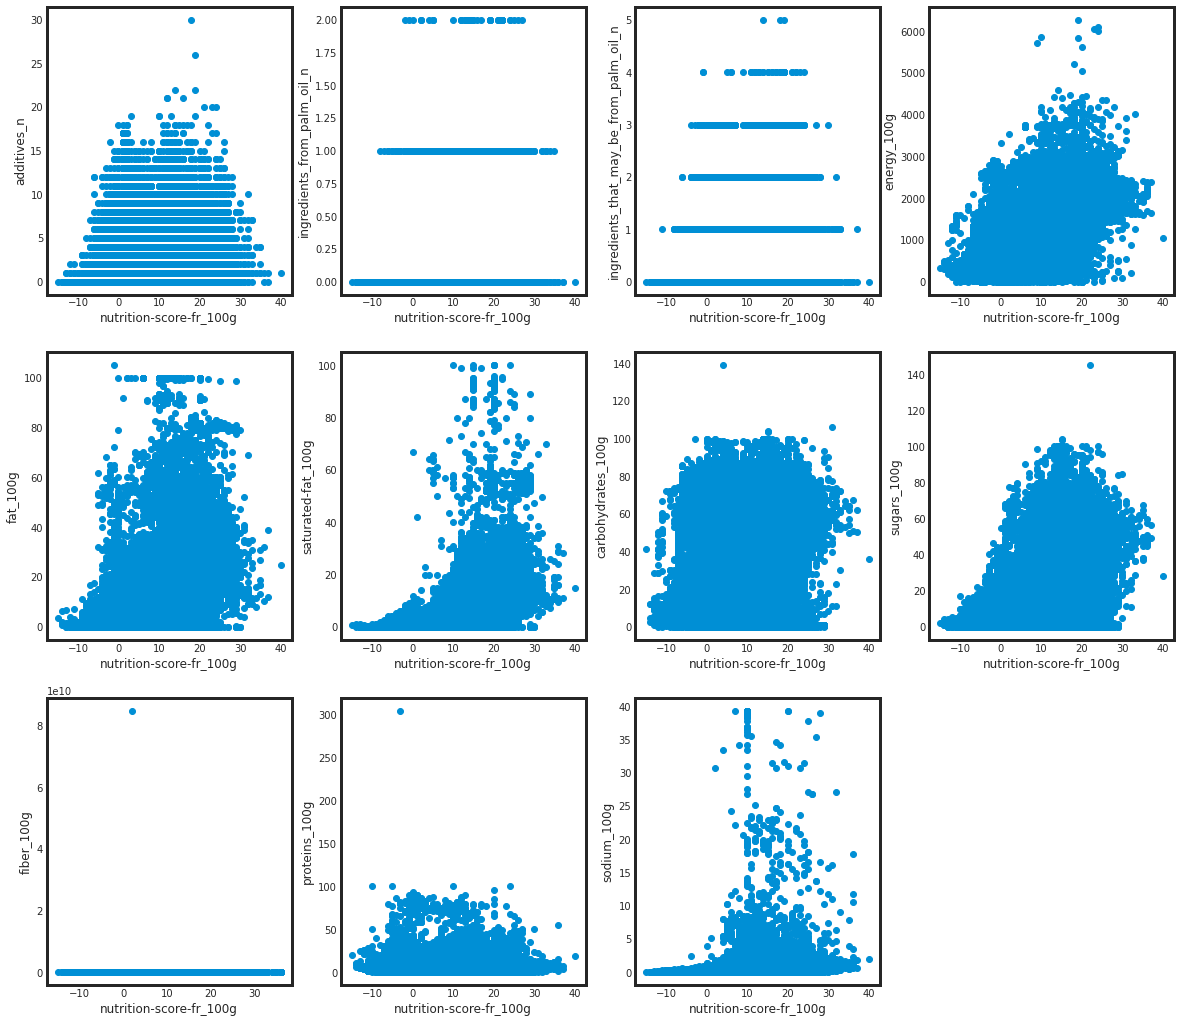

In [11]:
# Plotting for bivariate analysis using 'nutrition-score-fr_100g'
col_plot = ['additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
 'proteins_100g', 'sodium_100g']

def bivariate_analysis(df, ref_col, col_list):
    rows = np.ceil(len(col_list)/4)
    fig = plt.figure(figsize=(18,6*rows))
    sns.set_style('white', {'legend.frameon':True})
    for i in range(1, (len(col_list)+1)):
        ax = fig.add_subplot(rows, 4, i)
        ax.scatter(df[ref_col], df[col_list[i-1]])
        ax.set_xlabel(ref_col)
        ax.set_ylabel(col_list[i-1])
    plt.savefig("High resoltion.png",dpi=300)
    plt.show()

bivariate_analysis(df_explore, 'nutrition-score-fr_100g', col_plot)

In [13]:
# Getting the correlation coeff:
df_explore[col_plot].corrwith(df_explore['nutrition-score-fr_100g']).sort_values()

fiber_100g                                -0.002616
proteins_100g                              0.085008
ingredients_that_may_be_from_palm_oil_n    0.107356
sodium_100g                                0.119289
additives_n                                0.174024
carbohydrates_100g                         0.222315
ingredients_from_palm_oil_n                0.234459
sugars_100g                                0.429230
fat_100g                                   0.531180
saturated-fat_100g                         0.588610
energy_100g                                0.588713
dtype: float64

 ###  The variables that positively influence the nutrition_score
 ### (most correlated) are the presence of sugar, fat and saturated_fat.
 ### On the opposite, the presence of fiber negatively correlate with the nutrition_score.

In [14]:
df_explore['nutrition_grade_fr'].isnull().value_counts()
# Changing the type of the target column
df_explore['nutrition_grade_fr'].astype('category')

7         e
9         d
10        c
13        e
14        d
         ..
109976    b
109977    d
109978    d
109982    a
109983    b
Name: nutrition_grade_fr, Length: 82457, dtype: category
Categories (5, object): ['a', 'b', 'c', 'd', 'e']

 ### Predicting the nutritional category of a food product

 #### Preparing the Dataset, splitting into train and test sets (using K-Fold cross validation):

In [15]:
kf = KFold(5, shuffle=True, random_state=1)
target_pred = 'nutrition_grade_fr'

train_col = ['additives_n','ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
 'proteins_100g', 'sodium_100g']
# Replacing missing values with 0
df_train = df_explore[train_col].fillna(0)

#### Using Decision Trees:

In [16]:
# fitting a decision tree using the entire df to get an idea of the features importance:
clf = DecisionTreeClassifier(random_state=1)
clf.fit(df_train, df_explore[target_pred])
train_predictions = clf.predict(df_train)

feature_importance = (dict(zip(df_train.columns, clf.feature_importances_)))

#### Get the feature importance for the dict

In [17]:
for w in sorted(feature_importance, key=feature_importance.get, reverse=True):
    print(w, feature_importance[w])

saturated-fat_100g 0.22875184223106723
sodium_100g 0.20236558235395788
sugars_100g 0.1692155970842681
energy_100g 0.15519258429718663
fiber_100g 0.11838893608909486
proteins_100g 0.07861397014631033
carbohydrates_100g 0.030806208803493797
additives_n 0.014112399233724307
ingredients_that_may_be_from_palm_oil_n 0.0013259347255653027
ingredients_from_palm_oil_n 0.0012269450353317086


Interestingly, the most importants features for the Decision Tree classification are saturated_fat, sodium, sugar, energy and fiber.

Conclusion: "Pour votre santé évité de manger tros gras, trop salé, trop sucré...!"

#### Using Decision Tree for Prediction:

In [18]:
model = DecisionTreeClassifier(random_state=1)
result = cross_val_score(model, df_train, df_explore[target_pred], scoring='accuracy', cv=kf)
print("Prediction accuracy using a simple Decision Tree: \n", result.mean())

Prediction accuracy using a simple Decision Tree: 
 0.8563008747169703


 #### Using Random Forests:

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=10, random_state=1, min_samples_leaf=2)
result_2 = cross_val_score(model_2, df_train, df_explore[target_pred], scoring='accuracy', cv=kf)
print("Prediction accuracy using RandomForestClassifier: \n", result_2.mean())

Prediction accuracy using RandomForestClassifier: 
 0.8789672669705858
